In [1]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

In [2]:
folder = 'author_weights_anno'
with open(os.path.join(folder, 'test_gts.json')) as f:
    test_actual = json.load(f)
with open(os.path.join(folder, 'test_lab.json')) as f:
    test_labels = json.load(f)
with open(os.path.join(folder, 'test_res.json')) as f:
    test_pred = json.load(f)
    
with open(os.path.join(folder, 'val_gts.json')) as f:
    val_actual = json.load(f)
with open(os.path.join(folder, 'val_lab.json')) as f:
    val_labels = json.load(f)
with open(os.path.join(folder, 'val_res.json')) as f:
    val_pred = json.load(f)

In [3]:
# remove unk from the results
test_pred = [' '.join(['<unk>' if word.startswith('<unk') else word for word in sentence.split(' ')]) for sentence in test_pred]

val_pred = [' '.join(['<unk>' if word.startswith('<unk') else word for word in sentence.split(' ')]) for sentence in val_pred]




In [46]:
test_pred_cnts

the heart size and mediastinal contours are within normal limits . the lungs are clear . there is no focal consolidation pneumothorax or pleural effusion . there is no acute bony abnormalities .                          482
the heart size and pulmonary vascularity appear within normal limits . the lungs are clear without focal airspace disease . no pleural effusion or pneumothorax .                                                            28
the heart size and pulmonary vascularity appear within normal limits . the lungs are clear . there is no focal consolidation pneumothorax or pleural effusion .                                                              23
the heart size and pulmonary vascularity appear within normal limits . the lungs are clear without focal airspace disease . there is no pleural effusion or pneumothorax .                                                   22
the heart size and mediastinal contours are within normal limits . the lungs are clear . there is no foc

In [41]:
set([word for sentence in list(test_pred_cnts.keys()) for word in sentence.split(' ')])

{'.',
 'abnormalities',
 'acute',
 'airspace',
 'and',
 'appear',
 'are',
 'bony',
 'clear',
 'consolidation',
 'contour',
 'contours',
 'disease',
 'effusion',
 'focal',
 'free',
 'heart',
 'in',
 'is',
 'limits',
 'lungs',
 'mediastinal',
 'no',
 'normal',
 'of',
 'or',
 'pleural',
 'pneumothorax',
 'pulmonary',
 'seen',
 'size',
 'the',
 'there',
 'vascularity',
 'within',
 'without'}

### Analyse validation/test labels

In [5]:
test_label_idx = [str([idx for idx, num in enumerate(lst) if num==1]) for lst in test_labels]
val_label_idx = [str([idx for idx, num in enumerate(lst) if num==1]) for lst in val_labels]

In [6]:
test_label_idx1 = pd.Series(test_label_idx).value_counts()

In [7]:
val_label_idx1 = pd.Series(val_label_idx).value_counts()

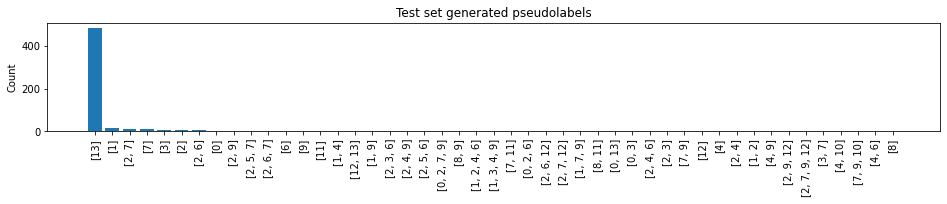

In [8]:
plt.figure(figsize=(16,2))
plt.bar((test_label_idx1.keys()), list(test_label_idx1))
plt.title('Test set generated pseudolabels')
plt.xticks(rotation=90)
plt.ylabel('Count')
plt.show()

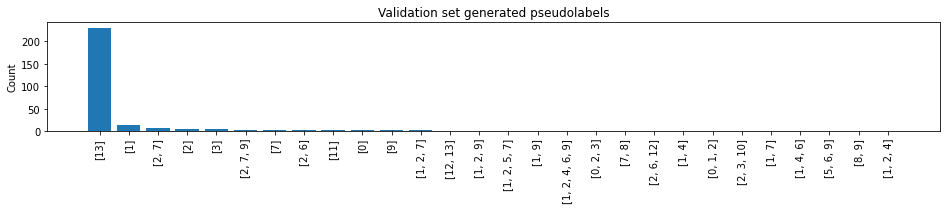

In [9]:
plt.figure(figsize=(16,2))
plt.bar((val_label_idx1.keys()), list(val_label_idx1))
plt.title('Validation set generated pseudolabels')
plt.xticks(rotation=90)
plt.ylabel('Count')
plt.show()

### Analyse validation/test generated reports

In [10]:
print('Number of unique generated reports from test set:', len(pd.Series(test_pred).value_counts()))
print('Number of unique actual reports from test set:', len(pd.Series(test_actual).value_counts()))
print('Number of unique pseudo-labels from test set:', len(pd.Series(test_label_idx1)))
print('Size of test set:', len(test_pred))

Number of unique generated reports from test set: 18
Number of unique actual reports from test set: 396
Number of unique pseudo-labels from test set: 47
Size of test set: 590


In [11]:
test_pred_cnts = pd.Series(test_pred).value_counts()

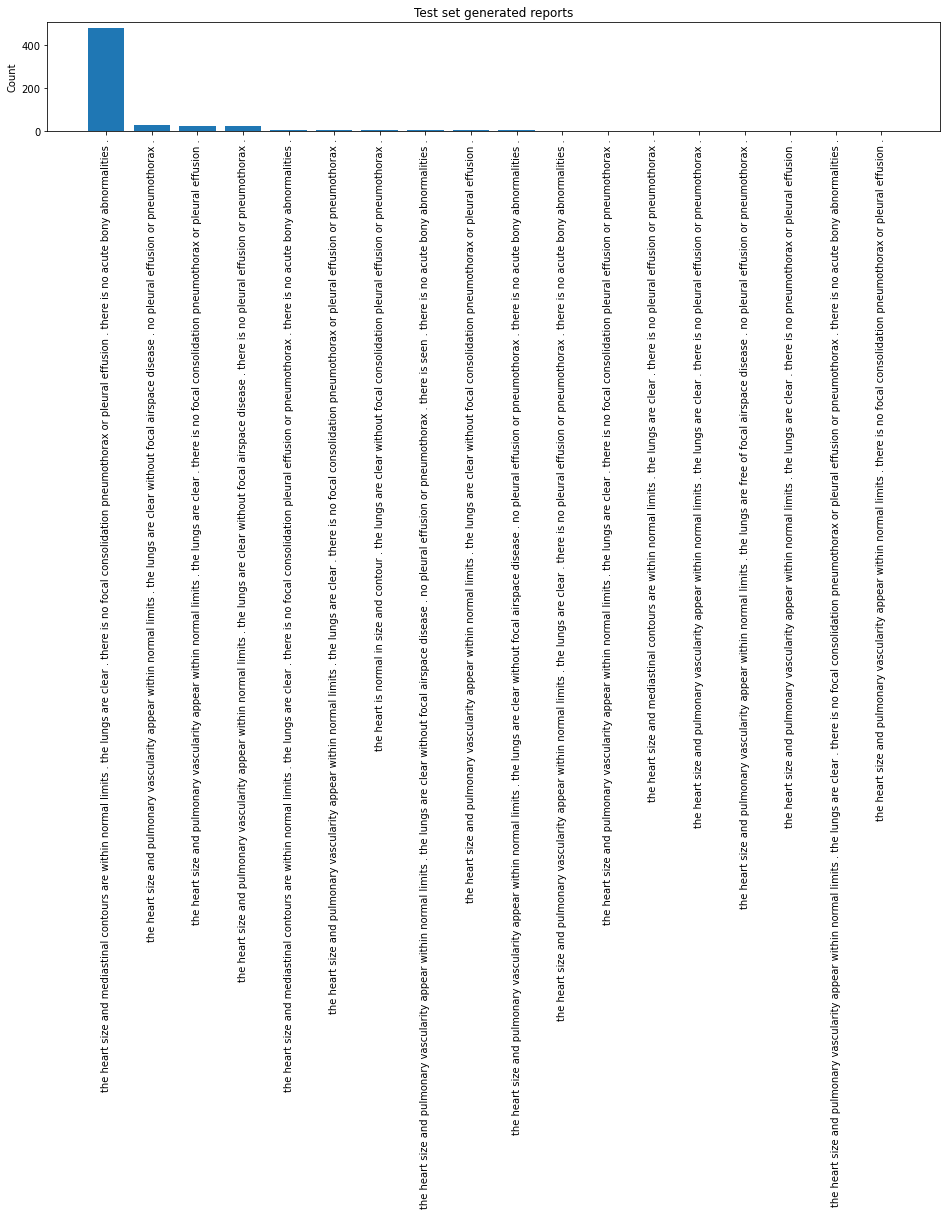

In [12]:
plt.figure(figsize=(16,2))
plt.bar([s for s in test_pred_cnts.keys()], list(test_pred_cnts))
plt.title('Test set generated reports')
plt.xticks(rotation=90)
plt.ylabel('Count')
plt.show()

In [13]:
print('Number of unique generated reports from val set:', len(pd.Series(val_pred).value_counts()))
print('Number of unique actual reports from val set:', len(pd.Series(val_actual).value_counts()))
print('Number of unique pseudo-labels from val set:', len(pd.Series(val_label_idx1)))
print('Size of val set:', len(val_pred))

Number of unique generated reports from val set: 12
Number of unique actual reports from val set: 270
Number of unique pseudo-labels from val set: 28
Size of val set: 296


In [14]:
val_pred_cnts = pd.Series(val_pred).value_counts()

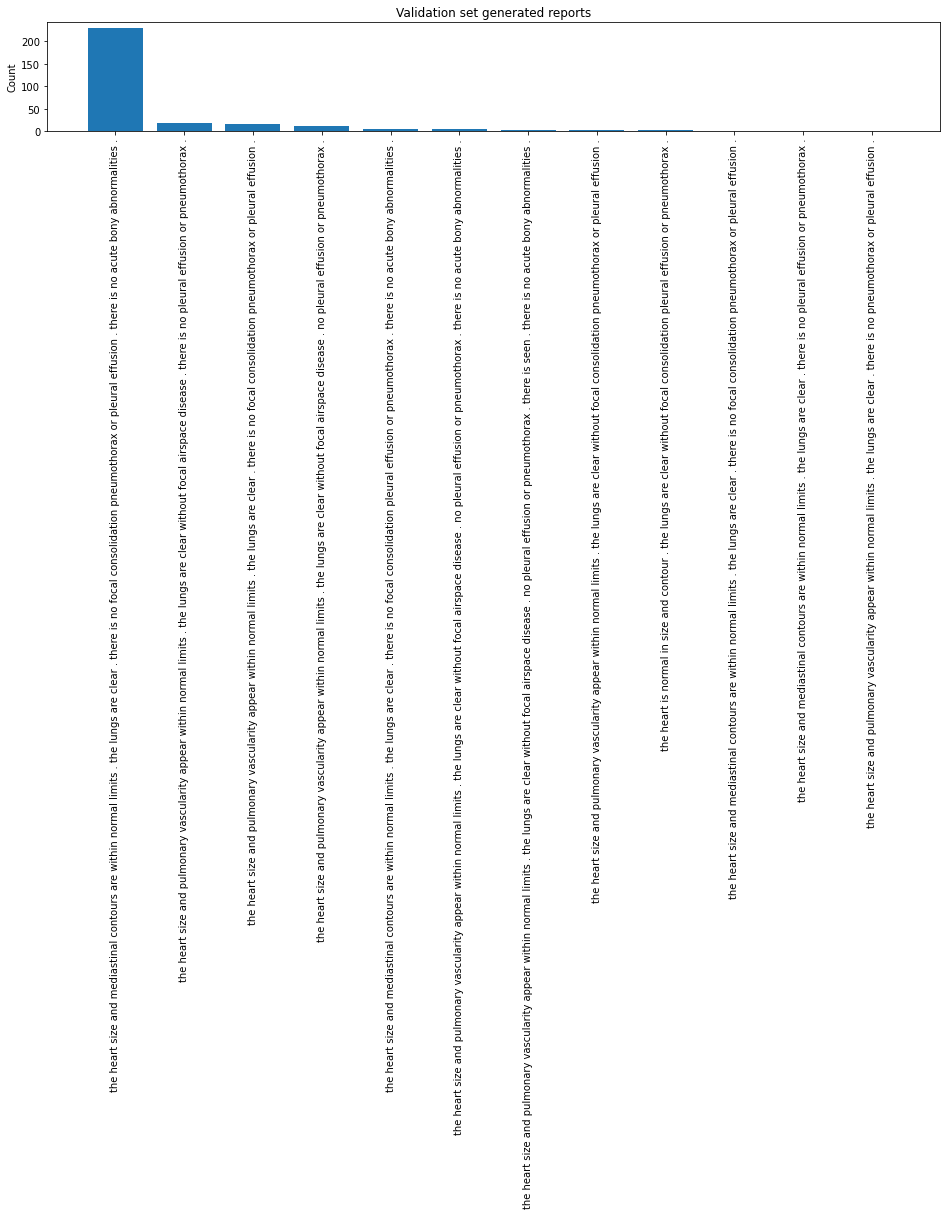

In [15]:
plt.figure(figsize=(16,2))
plt.bar([s for s in val_pred_cnts.keys()], list(val_pred_cnts))
plt.title('Validation set generated reports')
plt.xticks(rotation=90)
plt.ylabel('Count')
plt.show()

### Comparing validation/testing generated reports and their pseudolabels

In [16]:
test_pairs = pd.Series([i for i in zip(test_label_idx, test_pred)]).value_counts()
val_pairs = pd.Series([i for i in zip(val_label_idx, val_pred)]).value_counts()

In [17]:
test_dict = {}
for tup, val in zip(test_pairs.keys(), list(test_pairs)):
    if tup[0] not in test_dict:
        test_dict[tup[0]] = [(tup[1], val)]
    else:
        test_dict[tup[0]].append((tup[1], val))
        
test_dict1 = {}
for tup, val in zip(test_pairs.keys(), list(test_pairs)):
    if tup[1] not in test_dict1:
        test_dict1[tup[1]] = [(tup[0], val)]
    else:
        test_dict1[tup[1]].append((tup[0], val))

In [18]:
# dictionary that has the unique report as the key, and a list of its associated labels and counts as its values
test_dict1

{'the heart size and mediastinal contours are within normal limits . the lungs are clear . there is no focal consolidation pneumothorax or pleural effusion . there is no acute bony abnormalities .': [('[13]',
   482)],
 'the heart size and pulmonary vascularity appear within normal limits . the lungs are clear without focal airspace disease . there is no pleural effusion or pneumothorax .': [('[1]',
   16),
  ('[6]', 3),
  ('[0, 2, 6]', 1),
  ('[1, 3, 4, 9]', 1),
  ('[1, 2]', 1)],
 'the heart size and pulmonary vascularity appear within normal limits . the lungs are clear . there is no focal consolidation pneumothorax or pleural effusion .': [('[7]',
   9),
  ('[2, 7]', 8),
  ('[2]', 5),
  ('[1, 7, 9]', 1)],
 'the heart size and mediastinal contours are within normal limits . the lungs are clear . there is no focal consolidation pleural effusion or pneumothorax . there is no acute bony abnormalities .': [('[3]',
   6)],
 'the heart size and pulmonary vascularity appear within normal li

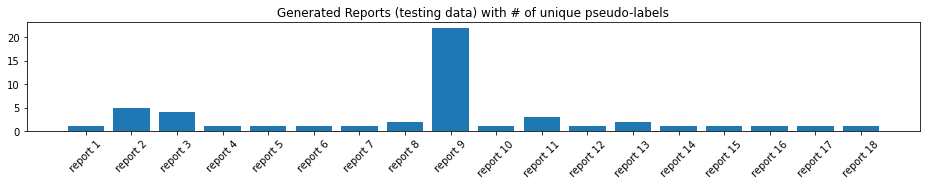

In [19]:
plt.figure(figsize=(16,2))
plt.bar(['report '+str(i+1) for i in range(len(test_dict1))], [len(i) for i in test_dict1.values()])
plt.title('Generated Reports (testing data) with # of unique pseudo-labels')
plt.xticks(rotation=45)
plt.show()

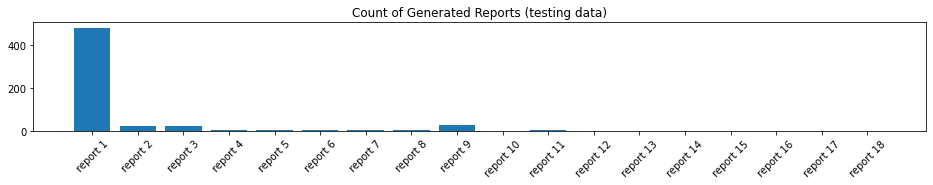

In [20]:
plt.figure(figsize=(16,2))
plt.bar(['report '+str(i+1) for i in range(len(test_dict1))], [sum([j[1] for j in i]) for i in test_dict1.values()])
plt.title('Count of Generated Reports (testing data)')
plt.xticks(rotation=45)
plt.show()

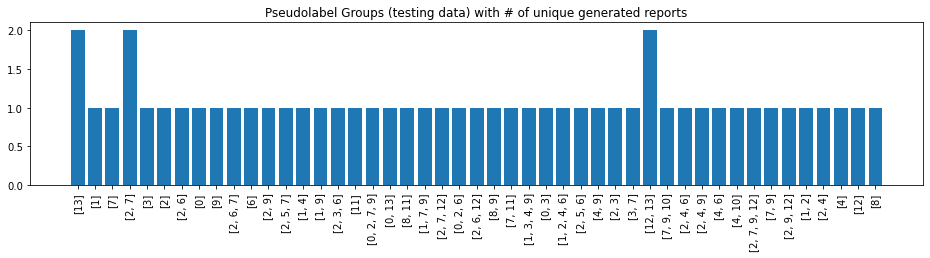

In [21]:
plt.figure(figsize=(16,3))
plt.bar(list(test_dict.keys()), [len(i) for i in test_dict.values()])
plt.title('Pseudolabel Groups (testing data) with # of unique generated reports')
plt.xticks(rotation=90)
plt.show()

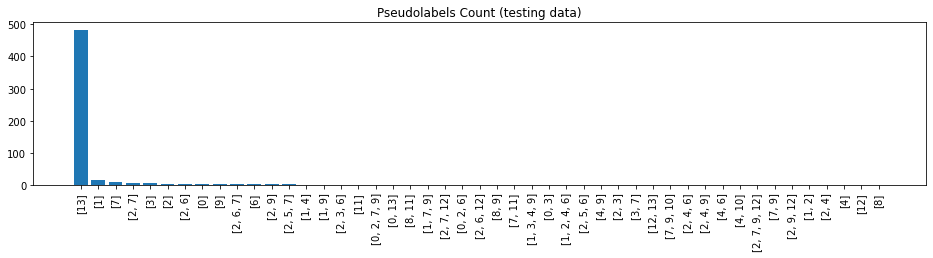

In [22]:
plt.figure(figsize=(16,3))
plt.bar(list(test_dict.keys()), [i[0][1] for i in test_dict.values()])
plt.title('Pseudolabels Count (testing data)')
plt.xticks(rotation=90)
plt.show()

In [23]:
val_dict = {}
for tup, val in zip(val_pairs.keys(), list(val_pairs)):
    if tup[0] not in val_dict:
        val_dict[tup[0]] = [(tup[1], val)]
    else:
        val_dict[tup[0]].append((tup[1], val))
        
val_dict1 = {}
for tup, val in zip(val_pairs.keys(), list(val_pairs)):
    if tup[1] not in val_dict1:
        val_dict1[tup[1]] = [(tup[0], val)]
    else:
        val_dict1[tup[1]].append((tup[0], val))

In [24]:
# dictionary that has the unique report as the key, and a list of its associated labels and counts as its values
val_dict1

{'the heart size and mediastinal contours are within normal limits . the lungs are clear . there is no focal consolidation pneumothorax or pleural effusion . there is no acute bony abnormalities .': [('[13]',
   231)],
 'the heart size and pulmonary vascularity appear within normal limits . the lungs are clear without focal airspace disease . there is no pleural effusion or pneumothorax .': [('[1]',
   13),
  ('[1, 2, 7]', 2),
  ('[1, 2, 5, 7]', 1),
  ('[0, 1, 2]', 1),
  ('[1, 7]', 1)],
 'the heart size and pulmonary vascularity appear within normal limits . the lungs are clear . there is no focal consolidation pneumothorax or pleural effusion .': [('[2, 7]',
   7),
  ('[2]', 5),
  ('[7]', 3),
  ('[1, 2, 9]', 1)],
 'the heart size and mediastinal contours are within normal limits . the lungs are clear . there is no focal consolidation pleural effusion or pneumothorax . there is no acute bony abnormalities .': [('[3]',
   4)],
 'the heart size and pulmonary vascularity appear within nor

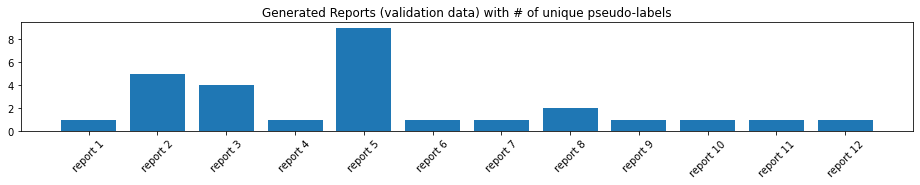

In [25]:
plt.figure(figsize=(16,2))
plt.bar(['report '+str(i+1) for i in range(len(val_dict1))], [len(i) for i in val_dict1.values()])
plt.title('Generated Reports (validation data) with # of unique pseudo-labels')
plt.xticks(rotation=45)
plt.show()

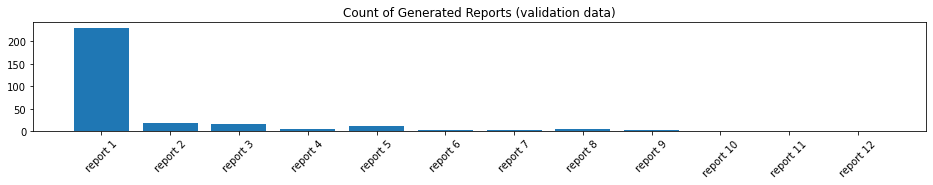

In [26]:
plt.figure(figsize=(16,2))
plt.bar(['report '+str(i+1) for i in range(len(val_dict1))], [sum([j[1] for j in i]) for i in val_dict1.values()])
plt.title('Count of Generated Reports (validation data)')
plt.xticks(rotation=45)
plt.show()

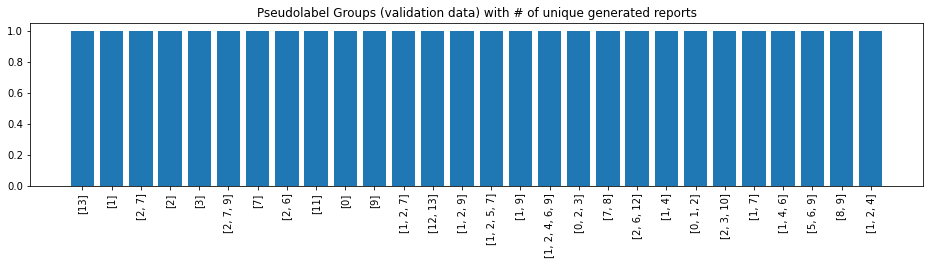

In [27]:
plt.figure(figsize=(16,3))
plt.bar(list(val_dict.keys()), [len(i) for i in val_dict.values()])
plt.title('Pseudolabel Groups (validation data) with # of unique generated reports')
plt.xticks(rotation=90)
plt.show()

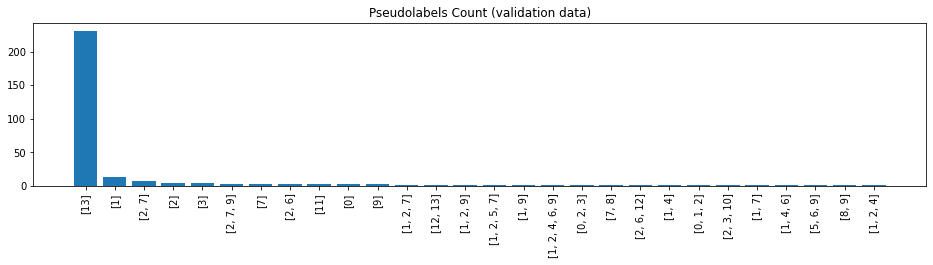

In [28]:
plt.figure(figsize=(16,3))
plt.bar(list(val_dict.keys()), [i[0][1] for i in val_dict.values()])
plt.title('Pseudolabels Count (validation data)')
plt.xticks(rotation=90)
plt.show()